<a href="https://colab.research.google.com/github/Jesus2342/NLP/blob/main/Copia_amazonBaby_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## 9.2 Actividad: Traducciones y Clasificación de Textos


#### **Nombres y matrículas de los integrantes del equipo:**



*   José de Jesús Peña Rodríguez    A01794940
*   Gustavo Pérez Juárez            A01795310
*   Anghelo Daniel Pérez Martínez   A01795323
*   Rafael Alexis Pinto Flores      A01794500
*   Irene Plascencia Villalobos     A01625258








In [1]:
#!pip install -q transformers
#!pip install transformers[torch]
#!pip install datasets transformers huggingface_hub
#!apt-get install git-lfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [1]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
# Incluye aquí todas las librerías y paquetes que requieras.


import os
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import numpy as np
from datasets import load_metric
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/NLP"
os.chdir(DIR)

In [ ]:
#from huggingface_hub import notebook_login
#notebook_login()

## 1. Descarga el archivo amazonbaby5000.csv que se encuentra en Canvas. Este archivo está formado de 5 mil comentarios en inglés sobre productos para bebé adquiridos a través de la plataforma de Amazon.



In [4]:
# Crear el DataFrame
df = pd.read_csv("amazonbaby5000.csv")

In [5]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  5000 non-null   object
 1   rating  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [5]:
# Y veamos sus primeros registros y asignamos la X para las reviews y Y para las calificaciones:
X = df.review     # Serie de strings
Y = df.rating  # Serie de enteros 0s y 1s
df.head(3)


,review,rating
0,I think it is more Expensive than drugstore th...,0
1,"When I saw this on Amazon, I put it into my wi...",1
2,We really like these valances. They have such...,1


## 2. Realiza una partición de los datos en el porcentaje que consideres adecuado, en entrenamiento y prueba.

In [7]:
# ************* Inicia la sección de agregar código:*****************************
#Dividir los datos, conjuntos de entrenamiento (70%) y validación/prueba(30%).
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(X, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test_s = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)



# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test_s))

# *********** Termina la sección de agregar código *************

X,y Train: 3500 3500
X,y Val: 750 750
X,y Test 750 750


## 3. Utiliza un modelo Transformer de HuggingFace para análisis de sentimiento en inglés y lleva a cabo la predicción de los comentarios en los siguientes casos:

#### A. Utiliza uno de los modelos Transformer pre-entrenados que consideres adecuado de DistilBERT de Huggingface para análisis de sentimiento y lleva a cabo el entrenamiento y evaluación del desempeño con exatitud (accuracy) y matriz de confusión. NOTA: Recuerda obtener el porcentaje de las clases positivas y negativas para tener una idea clara de si el modelo encontrado queda subentrenado.

##### **PREPARACION DE LOS DATOS PARA EL TRANSFORMER**

In [ ]:
def conversion_dataset(x_train_data, y_train_data, x_test_data, y_test_data):

    from transformers import AutoTokenizer
    from datasets import Dataset, DatasetDict
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

    # Concatenar las reviews y las calificaciones en diccionarios
    train_data={"text":x_train_data.tolist(),"label": y_train_data.tolist()}
    test_data={"text":x_test_data.tolist(),"label": y_test_data.tolist()}

    # Crear datasets temporales a partir de los diccionarios
    train_dataset=Dataset.from_dict(train_data)
    test_dataset=Dataset.from_dict(test_data)

    def preprocess_function(examples):
      return tokenizer(examples["text"], truncation=True)

    tokenized_train_temp = train_dataset.map(preprocess_function, batched=True)
    tokenized_test_temp = test_dataset.map(preprocess_function, batched=True)

    return tokenized_train_temp, tokenized_test_temp

#Generamos los dataset de train y test para el modelo
tokenized_train, tokenized_test = conversion_dataset(x_train, y_train, x_val, y_val)


Map:   0%|          | 0/3500 [00:00<?, ? examples/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

##### **ENTRENAMIENTO DEL MODELO**

####Función para el calculo de Accuracy y F1 del modelo de entranamiento

In [ ]:
#Calculo de metricas
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   return {"accuracy": accuracy, "f1": f1}

####**Generación del modelo y setup del modelo pre-entrenado**

In [ ]:
from transformers import DataCollatorWithPadding
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
import numpy as np
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer

#Generaciond el modelo usado el modelo pre-entrado distilbert
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


repo_name = "amazonbaby-5000"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


###Entrenamiento del modelo y evaluación: En

In [ ]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=438, training_loss=0.262175816923516, metrics={'train_runtime': 215.8309, 'train_samples_per_second': 32.433, 'train_steps_per_second': 2.029, 'total_flos': 606765884642256.0, 'train_loss': 0.262175816923516, 'epoch': 2.0})

In [ ]:
trainer.evaluate()

<ipython-input-11-b943b97e21e4>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


The repository for f1 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/f1.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


{'eval_loss': 0.24475964903831482,
 'eval_accuracy': 0.9106666666666666,
 'eval_f1': 0.9407603890362511,
 'eval_runtime': 64.587,
 'eval_samples_per_second': 11.612,
 'eval_steps_per_second': 0.728,
 'epoch': 2.0}

In [ ]:
#Mandar el modelo a Hugginface
#trainer.push_to_hub()

####**EVALUACION**: Generamos la matrix de confusion del confusion usando los datos de prueba.

#####Nota: Los datos de prueba han sido reducidos a 100 muestras debido al consumo de memoria RAM.

In [21]:
#Cambiamos el formato de prueba de Pandas Series a Listas
x_test = x_test.tolist()
y_test = y_test_s.tolist()

#El conjunto de prueba consta de 750 elementos lo pasaremos a analizar a un cojunto menor de 100
x_test = x_test[:100]
y_test = y_test[:100]

In [14]:
#Cargamos el modelo generado del paso anterior
modelo_equipo_35 = "Jxptlr/amazonbaby-5000"

# Cargamos el tokenizador del modelo preentreando y el mdodelo sugerido por el equipo
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(modelo_equipo_35)

#-----------------Para evitar un desborde de memoria-------------------

# Definimos un tamaño de lote de 16
batch_size = 16

# Función para procesar en lotes
def predict_in_batches(model, tokenizer, x_test_opniones, batch_size):
    predictions = []
    for i in range(0, len(x_test_opniones), batch_size):
        batch_texts = x_test_opniones[i:i+batch_size]
        inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")
        with torch.no_grad():
          outputs = model(**inputs)
          batch_predictions = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
          predictions.extend(batch_predictions)
    return np.array(predictions)

# Obtener las predicciones por lotes
predictions = predict_in_batches(model, tokenizer, x_test, batch_size)

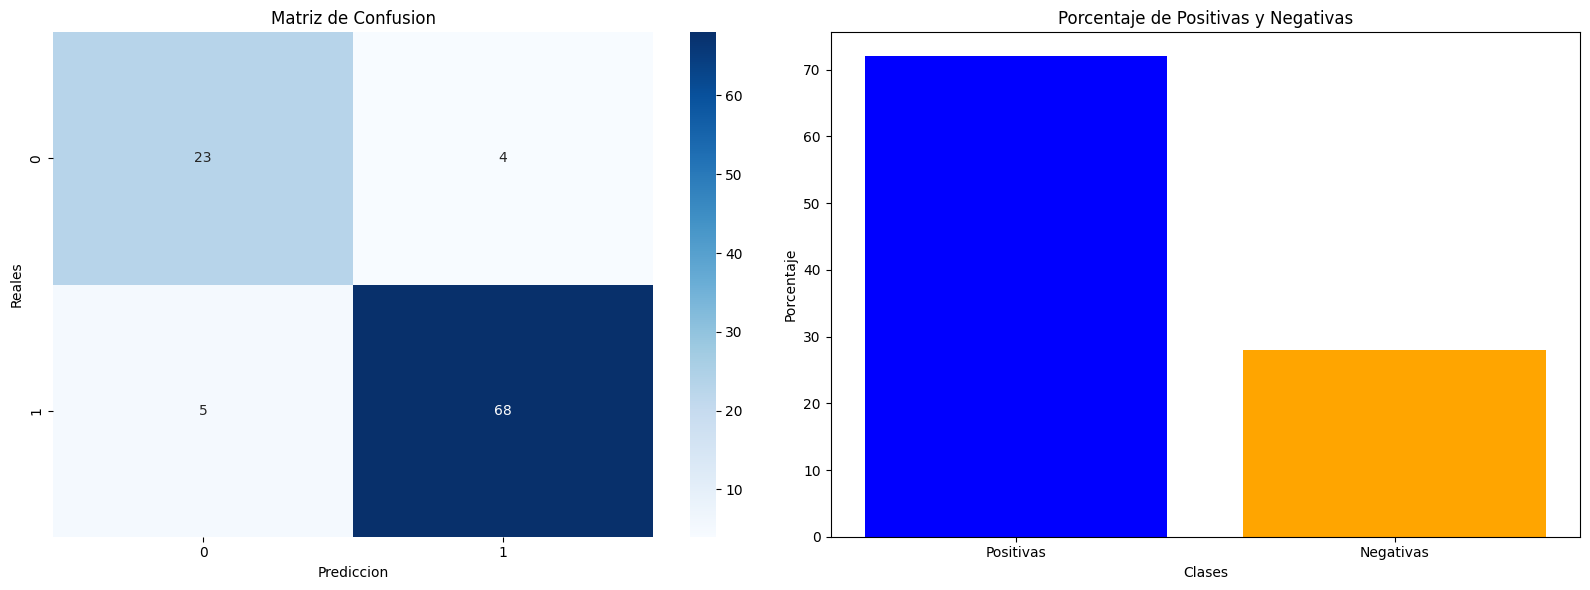

Porcentaje de Positivas: 72.0%
Porcentaje de Negativas: 28.0%


In [15]:
# Calculo de la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Calculo de porcentajes de clases
predictions_np= np.array(predictions)
total_predictions = len(predictions_np)
positivas = np.sum(predictions_np == 1)
negativas = np.sum(predictions_np == 0)

positivas_porcentaje = np.round((positivas / total_predictions) * 100, 2)
negativas_porcentaje = np.round((negativas / total_predictions) * 100, 2)

# Dimensiones de los dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax[0])
ax[0].set_xlabel('Prediccion')
ax[0].set_ylabel('Reales')
ax[0].set_title('Matriz de Confusion')

# Grafica  de barras
ax[1].bar(['Positivas', 'Negativas'], [positivas_porcentaje, negativas_porcentaje], color=['blue', 'orange'])
ax[1].set_xlabel('Clases')
ax[1].set_ylabel('Porcentaje')
ax[1].set_title('Porcentaje de Positivas y Negativas')

# Mostrar la figura
plt.tight_layout()
plt.show()

# Imprimir los porcentajes
print(f"Porcentaje de Positivas: {positivas_porcentaje}%")
print(f"Porcentaje de Negativas: {negativas_porcentaje}%")

### B. Realiza una partición del conjunto de entrenamiento en uno nuevo de entrenamiento y validación, con los porcentajes que consideres adecuados y utilizando el mismo modelo DistilBERT del inciso anterior, ajusta sus hiperparámetros (fine-tuning) para entrenar y evaluar el desempeño de este nuevo modelo.

In [16]:
# ************* Inicia la sección de agregar código:*****************************
#Dividir el conjunto de entrenamiento en un segundo conjunto .
particion_x_train, particion_x_val, particion_y_train, particion_y_val = train_test_split(x_train, y_train, train_size=.50, shuffle=True, random_state=1)


# verificemos las dimensiones obtenidas:
print(f'particion_x_train:  {len(particion_x_train)}')
print(f'particion_y_train:  {len(particion_y_train)}')
print(f'particion_x_val:  {len(particion_x_val)}')
print(f'particion_y_val:  {len(particion_y_val)}')

#print('particion_x_val,  particion_y_val1:', len(particion_x_val), len(particion_y_val)). , particion_y_train1:'{len(particion_y_train)})
# *********** Termina la sección de agregar código *************

particion_x_train:  1750
particion_y_train:  1750
particion_x_val:  1750
particion_y_val:  1750


In [ ]:
tokenized_train, tokenized_test = conversion_dataset(particion_x_train, particion_y_train, particion_x_val, particion_y_val)

Map:   0%|          | 0/1750 [00:00<?, ? examples/s]

Map:   0%|          | 0/1750 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
import numpy as np
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer

#Generaciond el modelo usado el modelo pre-entrado distilbert
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


repo_name = "Modelo_2_amazonbaby-5000"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=5e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=3,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=330, training_loss=0.2292574102228338, metrics={'train_runtime': 178.0049, 'train_samples_per_second': 29.494, 'train_steps_per_second': 1.854, 'total_flos': 452794784088024.0, 'train_loss': 0.2292574102228338, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.29907432198524475,
 'eval_accuracy': 0.9068571428571428,
 'eval_f1': 0.939651980747871,
 'eval_runtime': 19.6162,
 'eval_samples_per_second': 89.212,
 'eval_steps_per_second': 5.608,
 'epoch': 3.0}

In [ ]:
#Mandar el modelo a Hugginface
trainer.push_to_hub()

events.out.tfevents.1718505291.893dc4f2efcd.2319.5:   0%|          | 0.00/457 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Jxptlr/Modelo_2_amazonbaby-5000/commit/64af3ad5c12f95279bf918fccb3b43e4143dd93f', commit_message='End of training', commit_description='', oid='64af3ad5c12f95279bf918fccb3b43e4143dd93f', pr_url=None, pr_revision=None, pr_num=None)

### C. Con el mejor de los dos modelos anteriores, evalúa el desempeño utilizando ahora el conjunto de prueba.

####Generamos la matrix de confusion del confusion usando los datos de prueba.

####Nota: Se usaran los mismos datos de prueba que se usaron en el inciso pasado para poder saber que modelo tiene una mejor predicción a los datos

In [22]:
len(x_test)

100

In [23]:
modelo_equipo_35 = "Jxptlr/Modelo_2_amazonbaby-5000"

# Cargamos el tokenizador del modelo preentreando y el mdodelo sugerido por el equipo
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(modelo_equipo_35)
# Obtener las predicciones por lotes
predictions = predict_in_batches(model, tokenizer, x_test, batch_size)

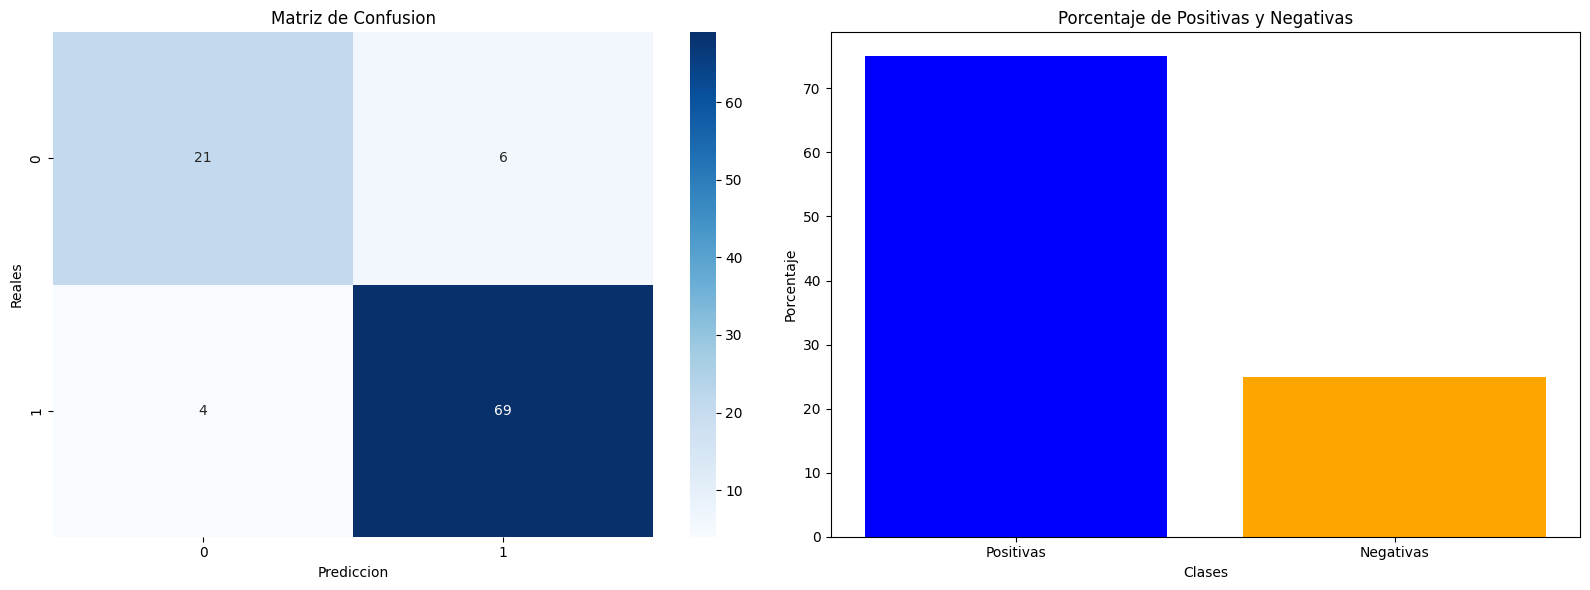

Porcentaje de Positivas: 75.0%
Porcentaje de Negativas: 25.0%


In [24]:
# Calculo de la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Calculo de porcentajes de clases
predictions_np= np.array(predictions)
total_predictions = len(predictions_np)
positivas = np.sum(predictions_np == 1)
negativas = np.sum(predictions_np == 0)

positivas_porcentaje = np.round((positivas / total_predictions) * 100, 2)
negativas_porcentaje = np.round((negativas / total_predictions) * 100, 2)

# Dimensiones de los dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax[0])
ax[0].set_xlabel('Prediccion')
ax[0].set_ylabel('Reales')
ax[0].set_title('Matriz de Confusion')

# Grafica  de barras
ax[1].bar(['Positivas', 'Negativas'], [positivas_porcentaje, negativas_porcentaje], color=['blue', 'orange'])
ax[1].set_xlabel('Clases')
ax[1].set_ylabel('Porcentaje')
ax[1].set_title('Porcentaje de Positivas y Negativas')

# Mostrar la figura
plt.tight_layout()
plt.show()

# Imprimir los porcentajes
print(f"Porcentaje de Positivas: {positivas_porcentaje}%")
print(f"Porcentaje de Negativas: {negativas_porcentaje}%")